# Machine Learning Exercise 3

### Step 1
Import The Libraries Required To Perform The Machine/Deep Learning Process On The Data. 

In [5]:
import numpy as np, matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [61]:
# Split The Data Into Training And Testing Sets
(trainX, trainY), (testX, testY) = datasets.cifar10.load_data()
# Create An Ordered List Of The Classes The Images Can Be In Based On The Dataset 
imageClasses = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
# Convert The trainY List From A 2-D Array To A 1-D Array
trainY = trainY.reshape(-1,)

### Step 2
Perform Data Exploration By Plotting the Images In The Notebook To Gain An Understanding Of The Data And Classify The Images Based On The Image Classes 

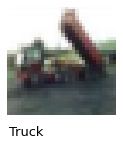

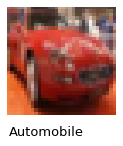

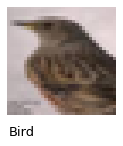

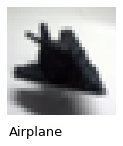

In [62]:
# Created A Function That Plots The Image And Adds A Label Of The Image Class
def pltImage(X, Y, Index):
    plt.figure(figsize = (17, 2))
    plt.imshow(X[Index])
    plt.rc('font', size = 13)
    plt.axis('off')
    plt.text(0, 37.5, imageClasses[Y[Index]])
    plt.show()
    
pltImage(trainX, trainY, 2)
pltImage(trainX, trainY, 5)
pltImage(trainX, trainY, 18)
pltImage(trainX, trainY, 29)

### Step 3
Normalize The Training And Testing Data By Dividing Both By 255 Since RGB Values Range From 0 To 255

In [8]:
trainX = trainX / 255
testX = testX / 255

### Step 4
Learn From The Image Data Using Convolution Neural Network On The Testing Set And Report The Accuracy Of The Predictions.

In [9]:
model = models.Sequential([
    
    # Convolution Layer Detects Image Features
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    
    # Pooling Is Used To Reduce The Dimension
    layers.MaxPooling2D((2, 2)),
    
    # Convolution Layer Detects Image Features
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    
    # Pooling Is Used To Reduce The Dimension
    layers.MaxPooling2D((2, 2)),
    
    # Dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(trainX, trainY, epochs = 20)

2022-04-15 19:24:23.883881: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-15 19:24:23.884225: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-15 19:24:23.884465: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-N877P7O): /proc/driver/nvidia/version does not exist
2022-04-15 19:24:23.918411: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-15 19:24:25.320772: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 e

Epoch 1/20
1563/1563 [==============================] - 28s 18ms/step - loss: 2.0194 - accuracy: 0.2660
Epoch 2/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.6640 - accuracy: 0.4055
Epoch 3/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4934 - accuracy: 0.4638
Epoch 4/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3877 - accuracy: 0.5063
Epoch 5/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.3015 - accuracy: 0.5386
Epoch 6/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2352 - accuracy: 0.5658
Epoch 7/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1799 - accuracy: 0.5865
Epoch 8/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1321 - accuracy: 0.6022
Epoch 9/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0913 - accuracy: 0.6197
Epoch 10/20
1563/1563 [==============================] - 29s 19m

### Step 5
Test The Model By Predicting The Object In The Images In The Testing Set And Convert The Prediction Results Into An Array. 

In [56]:
# Get The Probability Distribution For Each Image Being In The Class Using Predict
preditionResults = model.predict(testX)
# Create A List Of The Indexes With The Highest Probability The Image Is In That Class For Each Image
yClasses = [np.argmax(x) for x in preditionResults]
# Convert The testY List From A 2-D Array To A 1-D Array
testY = testY.reshape(-1,)
# Find The Accuracy Of Our Model
accuracyScore = model.evaluate(testX, testY)
print("\nThis Model Has An Accuracy Score Of " + str(round(accuracyScore[1]*100)) + "%")

313/313 [==============================] - 2s 7ms/step - loss: 0.9896 - accuracy: 0.6612

This Model Has An Accuracy Score Of 66%


### Step 6
Test Your Model On The Images To See If It Is Able To Correctly Predict The Class Each Image Is From. (Test Your Model On At Least 10 Images)

--------------------Actual Image Is--------------------


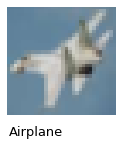

------------Predicted Image By The Model Is------------
Airplane
-------------------------------------------------------

--------------------Actual Image Is--------------------


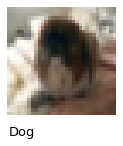

------------Predicted Image By The Model Is------------
Dog
-------------------------------------------------------

--------------------Actual Image Is--------------------


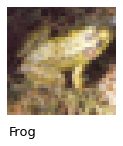

------------Predicted Image By The Model Is------------
Frog
-------------------------------------------------------

--------------------Actual Image Is--------------------


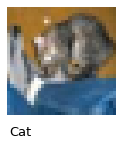

------------Predicted Image By The Model Is------------
Cat
-------------------------------------------------------

--------------------Actual Image Is--------------------


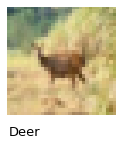

------------Predicted Image By The Model Is------------
Deer
-------------------------------------------------------

--------------------Actual Image Is--------------------


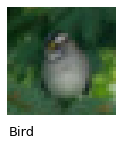

------------Predicted Image By The Model Is------------
Deer
-------------------------------------------------------

--------------------Actual Image Is--------------------


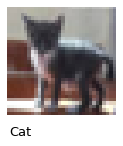

------------Predicted Image By The Model Is------------
Cat
-------------------------------------------------------

--------------------Actual Image Is--------------------


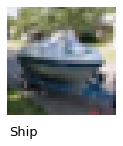

------------Predicted Image By The Model Is------------
Automobile
-------------------------------------------------------

--------------------Actual Image Is--------------------


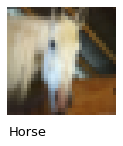

------------Predicted Image By The Model Is------------
Dog
-------------------------------------------------------

--------------------Actual Image Is--------------------


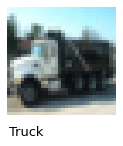

------------Predicted Image By The Model Is------------
Truck
-------------------------------------------------------



In [58]:
# Created A Function That Calls Another Function To Plot The Image And Prints Out The Image Class Predicted By The Model
def actualVsPredicted(X, Y, Index):
    print("--------------------Actual Image Is--------------------")
    pltImage(X, Y, Index)
    print("------------Predicted Image By The Model Is------------")
    print(imageClasses[yClasses[Index]])
    print("-------------------------------------------------------\n")

actualVsPredicted(testX, testY, 10)
actualVsPredicted(testX, testY, 200)
actualVsPredicted(testX, testY, 19)
actualVsPredicted(testX, testY, 0)
actualVsPredicted(testX, testY, 130)
actualVsPredicted(testX, testY, 900)
actualVsPredicted(testX, testY, 760)
actualVsPredicted(testX, testY, 358)
actualVsPredicted(testX, testY, 850)
actualVsPredicted(testX, testY, 175)

### Evaluation
Evaluate Your Model About How Accuracte And Useful It Is For Predicting The Object In The Image As Well As Documenting The Method Employed To Construct This Model

Using Deep Learning, I Was Able To Construct A Model That Can Predict The Object In The Image With The Help Of The Tensorflow Library. The Model Produced Is Accurate But Not To A Great Extent As It Had An Accuracy Sore Of 66%. Similarly, When Testing The Model, It Was Able To Correctly Predict 7/10 Images Which Relates Closely To The Accuracy Score And Although This Is More Than 50%, It Isn't Highly Accurate. However, With Some Fine Tuning To The Model And Increasing The Number Of Iterations On The Training Data, The Accuracy Of This Model Can Be Increased.